# SHORT TIME FOURIER TRANSFORM


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, stft
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

# MANO ABIERTA

In [104]:
df = pd.read_excel(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\Pacientes_6000\P10\mano abierta.xlsx")
df

,Canal_1,Canal_2,Canal_3,Canal_4,Canal_5,Canal_6,Canal_7,Canal_8
0,-0.007812,0.000000,0.007812,0.007812,0.023438,0.070312,0.000000,0.007812
1,-0.015625,-0.023438,-0.031250,-0.007812,0.000000,0.023438,-0.007812,0.000000
2,-0.007812,0.007812,-0.007812,0.000000,-0.039062,-0.070312,-0.023438,-0.015625
3,-0.015625,-0.007812,-0.007812,-0.015625,-0.023438,0.007812,-0.015625,0.046875
4,-0.015625,0.007812,0.000000,0.000000,0.000000,0.039062,0.000000,-0.007812
...,...,...,...,...,...,...,...,...
5995,0.296875,0.445312,0.000000,-0.015625,-0.070312,-0.250000,-0.031250,0.070312
5996,-0.179688,-0.015625,-0.070312,-0.093750,-0.164062,-0.117188,-0.164062,-0.070312
5997,0.023438,-0.070312,-0.031250,-0.031250,-0.062500,-0.210938,-0.117188,-0.226562
5998,-0.054688,-0.101562,-0.031250,0.031250,0.039062,0.070312,0.000000,0.046875


In [105]:
emg_data = df.values
# Número de muestras en tus datos
num_samples = emg_data.shape[0]

# Crear un arreglo de tiempo con 6000 puntos
time = np.arange(0, num_samples) # 200 es la frecuencia de muestreo
#time = np.linspace(0, duration, emg_data.shape[0])

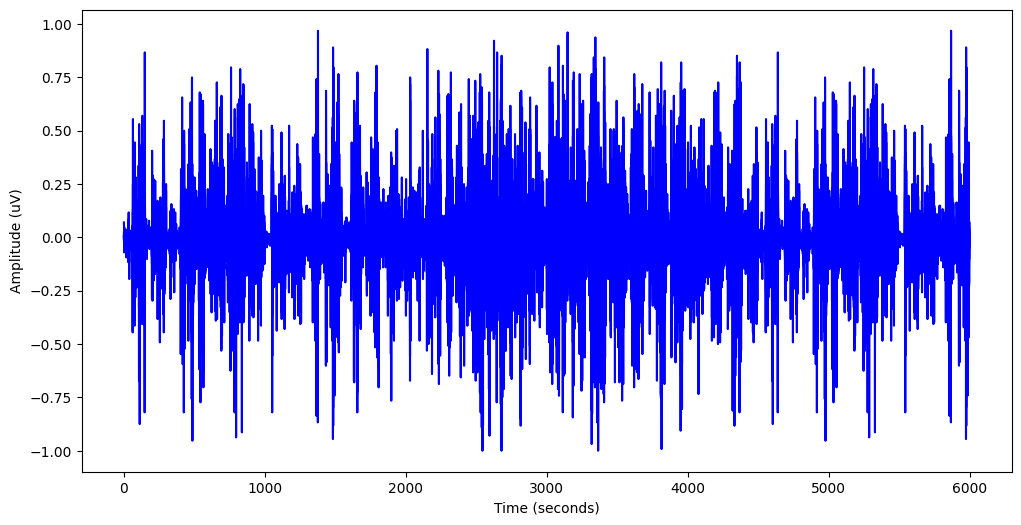

In [106]:
fig, ax = plt.subplots()
ax.plot(time, emg_data, color ='b')
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Amplitude (uV)")
#ax.set_title("EMG Signal - Open Hand- P10")
#ax.legend(["Canal 1", "Canal 2", "Canal 3", "Canal 4", "Canal 5", "Canal 6", "Canal 7", "Canal 8"])

# ajustar el tamaño de la figura para ampliar el plot horizontalmente
fig.set_size_inches((12, 6))  # tamaño en pulgadas: ancho = 12, altura = 6
#Guardar la señal EMG del segmento
#filename = "ManoAbierta.png"
#folder = r"C:\Users\JUANPABLOGASCA\Desktop\Posturas"
#plt.savefig(folder + "/" + filename)
plt.show()



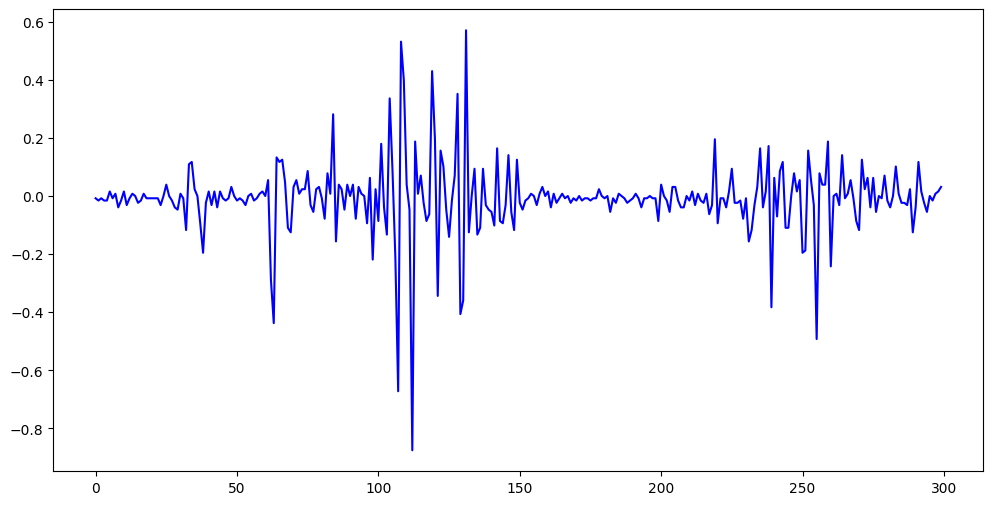

In [107]:
data1=df.iloc[:,0]
data2=data1[0:300]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data2, color='b')
fig.set_size_inches((12, 6))  # tamaño en pulgadas: ancho = 12, altura = 6
plt.show()

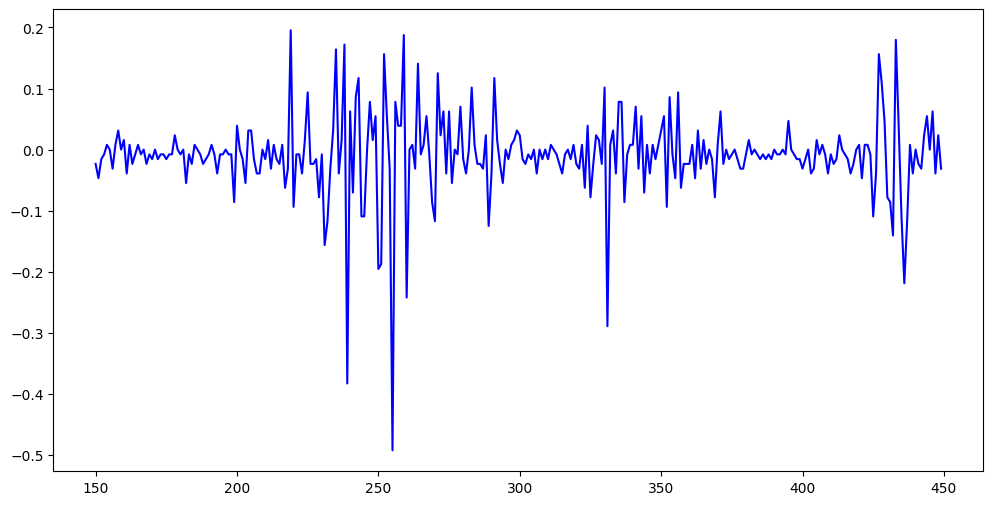

In [108]:
data1=df.iloc[:,0]
data2=data1[150:450]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data2, color='b')
fig.set_size_inches((12, 6))  # tamaño en pulgadas: ancho = 12, altura = 6
plt.show()

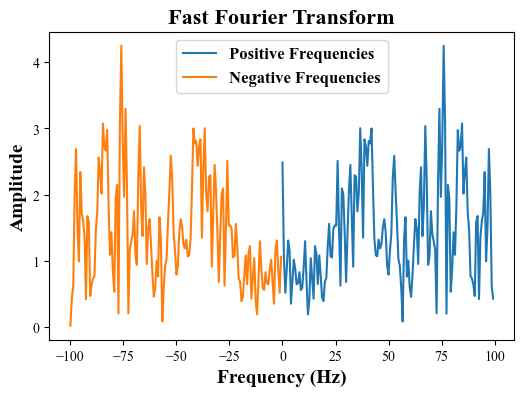

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# Seleccionar una ventana
window = np.hanning(len(data2))

# Aplicar la ventana a los datos
data2_windowed = data2 * window

# Calcular la transformada de Fourier de los datos
n = len(data2)
fft_data = np.fft.fft(data2_windowed, n=n)

# Calcular la magnitud de la transformada de Fourier bilateral
fft_mag = 2 * np.abs(fft_data)

# Calcular las frecuencias correspondientes
freqs = np.fft.fftfreq(n, d=1/fs)

# Configurar la fuente
plt.rcParams["font.family"] = "Times New Roman"

# Graficar los resultados
fig, ax = plt.subplots()
ax.plot(freqs[:n//2], fft_mag[:n//2], label='Positive Frequencies')
ax.plot(freqs[n//2:], fft_mag[n//2:], label='Negative Frequencies')
ax.set_xlabel('Frequency (Hz)', fontsize=14, fontweight='bold')  # Tamaño de letra aumentado y en negrita
ax.set_ylabel('Amplitude', fontsize=14, fontweight='bold')  # Tamaño de letra aumentado y en negrita
ax.set_title('Fast Fourier Transform', fontsize=16, fontweight='bold')  # Tamaño de letra aumentado y en negrita
# Crear la leyenda con el estilo de fuente deseado
legend = ax.legend(fontsize=12)
for text in legend.get_texts():
    text.set_fontweight("bold")

# Establecer el tamaño del gráfico
fig.set_size_inches((6, 4))
plt.show()





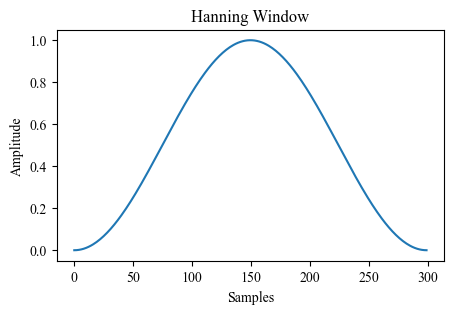

In [124]:
import numpy as np
import matplotlib.pyplot as plt

fs = 200

# Seleccionar una ventana
window = np.hanning(len(data2))

# Graficar la ventana
fig, ax = plt.subplots()
ax.plot(window)
ax.set_xlabel('Samples')
ax.set_ylabel('Amplitude')
ax.set_title('Hanning Window')
# Establecer el tamaño del plot
fig.set_size_inches((5, 3))
plt.show()


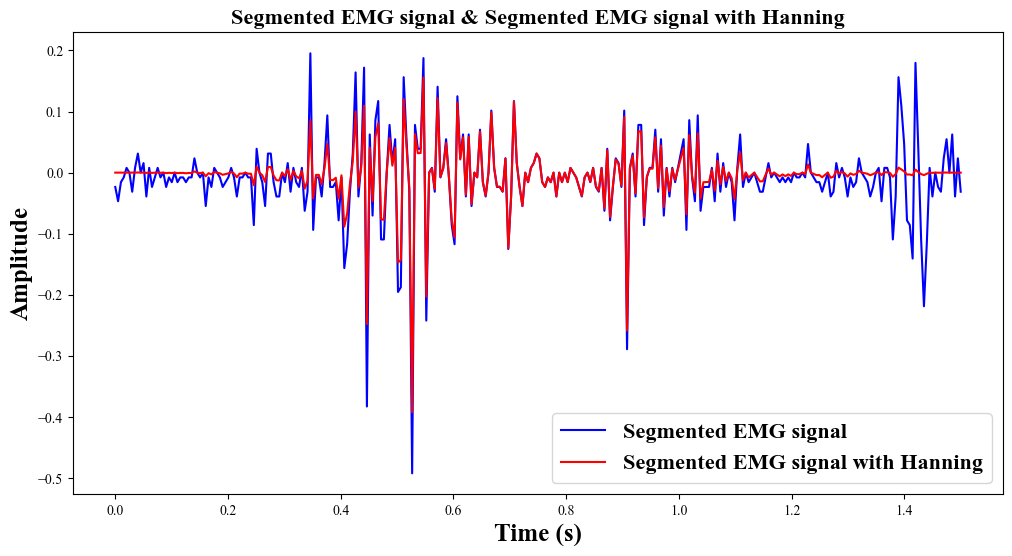

In [151]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una ventana de Hanning
window = np.hanning(len(data2))

# Aplicar la ventana de Hanning a la señal
signal_windowed = data2 * window

# Crear un arreglo de tiempo para el eje x
t = np.linspace(0, len(data2) / 200, len(data2))  # Suponiendo una frecuencia de muestreo de 200 Hz

# Graficar la señal original
fig, ax = plt.subplots()
ax.plot(t, data2, label='Segmented EMG signal', color='blue')
ax.set_xlabel('Time (s)', fontsize=18, fontweight='bold')  # Tamaño de letra aumentado y en negrita
ax.set_ylabel('Amplitude', fontsize=18, fontweight='bold')  # Tamaño de letra aumentado y en negrita
ax.set_title('Segmented EMG signal & Segmented EMG signal with Hanning', fontsize=16, fontweight='bold')  # Tamaño de letra aumentado y en negrita

# Graficar la señal con la ventana de Hanning
ax.plot(t, signal_windowed, label='Segmented EMG signal with Hanning', color='red')

# Crear la leyenda con el estilo de fuente deseado
legend = ax.legend(fontsize=16)
for text in legend.get_texts():
    text.set_fontweight("bold")

# Establecer el tamaño del gráfico
fig.set_size_inches((12, 6))
plt.show()


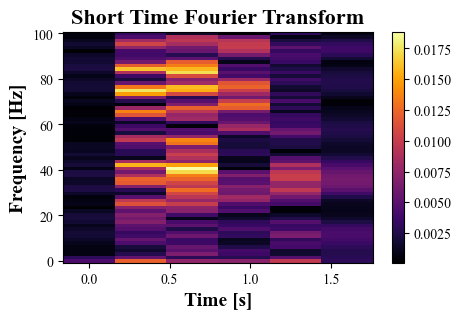

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

fs = 200
win_sz = int(128)  # Tamaño de la ventana en muestras
ham_win = np.hamming(win_sz)  # Ventana de Hamming

# Calcular el espectrograma
f, t, Zxx = stft(data2, fs, window=ham_win, nperseg=win_sz, noverlap=64)

# Graficar el espectrograma
fig, ax = plt.subplots()
im = ax.pcolormesh(t, f, np.abs(Zxx), cmap='inferno')
ax.set_ylabel('Frequency [Hz]', fontsize=14, fontweight='bold')  # Tamaño de letra aumentado y en negrita
ax.set_xlabel('Time [s]', fontsize=14, fontweight='bold')  # Tamaño de letra aumentado y en negrita
ax.set_title('Short Time Fourier Transform', fontsize=16, fontweight='bold')  # Tamaño de letra aumentado y en negrita

# Agrega la barra de color
fig.colorbar(im, ax=ax)

# Establecer el tamaño del plot
fig.set_size_inches((5, 3))
plt.show()



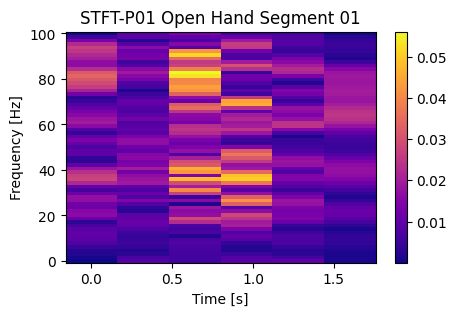

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

fs = 200
win_sz = int(128)  # Tamaño de la ventana en muestras
gaussian_win = np.exp(-(np.arange(win_sz) - win_sz / 2)**2 / (2 * (win_sz / 6)**2))  # Ventana gaussiana

# Calcular el espectrograma
f, t, Zxx = stft(data2, fs, window=gaussian_win, nperseg=win_sz, noverlap=64)

# Graficar el espectrograma
fig, ax = plt.subplots()
im = ax.pcolormesh(t, f, np.abs(Zxx), cmap='plasma')
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [s]')
ax.set_title('STFT-P01 Open Hand Segment 01')
# Agrega la barra de color
fig.colorbar(im, ax=ax)
# Establecer el tamaño del plot
fig.set_size_inches((5, 3))
plt.show()


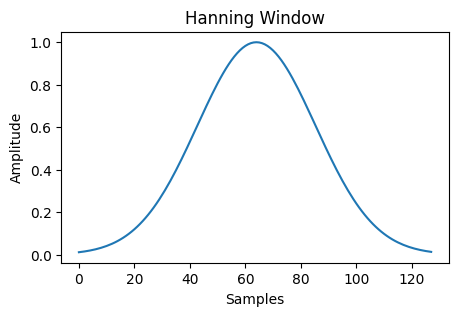

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fs = 200

# Seleccionar una ventana
window = np.exp(-(np.arange(win_sz) - win_sz / 2)**2 / (2 * (win_sz / 6)**2))  # Ventana gaussiana

# Graficar la ventana
fig, ax = plt.subplots()
ax.plot(window)
ax.set_xlabel('Samples')
ax.set_ylabel('Amplitude')
ax.set_title('Hanning Window')
# Establecer el tamaño del plot
fig.set_size_inches((5, 3))
plt.show()

# MANO ADENTRO


In [22]:
df = pd.read_excel(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\Pacientes_6000\P10\mano adentro.xlsx")
df

,Canal_1,Canal_2,Canal_3,Canal_4,Canal_5,Canal_6,Canal_7,Canal_8
0,0.000000,0.000000,0.007812,-0.007812,-0.039062,0.000000,-0.007812,0.000000
1,-0.007812,-0.007812,-0.007812,-0.015625,-0.015625,-0.015625,-0.023438,-0.007812
2,0.000000,-0.007812,-0.015625,-0.007812,-0.023438,0.000000,0.007812,-0.023438
3,-0.007812,-0.007812,-0.007812,0.007812,0.015625,-0.039062,-0.039062,-0.007812
4,-0.015625,-0.015625,-0.015625,-0.015625,-0.054688,0.007812,0.000000,-0.007812
...,...,...,...,...,...,...,...,...
5995,-0.007812,-0.015625,-0.007812,-0.054688,-0.039062,-0.015625,0.015625,0.015625
5996,-0.007812,-0.023438,0.000000,-0.007812,0.007812,-0.015625,-0.023438,-0.023438
5997,-0.015625,-0.015625,-0.015625,-0.007812,0.007812,-0.023438,-0.039062,0.000000
5998,0.007812,0.000000,0.007812,0.023438,0.046875,0.046875,0.054688,0.023438


In [23]:
emg_data = df.values
duration = emg_data.shape[0] / 200
time = np.linspace(0, duration, emg_data.shape[0])

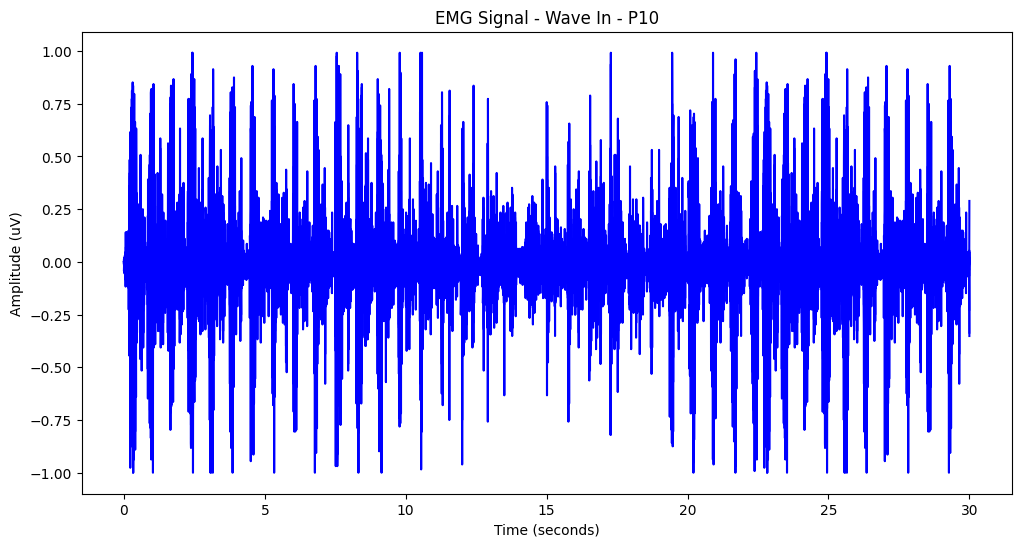

In [24]:
fig, ax = plt.subplots()
ax.plot(time, emg_data, color ='b')
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Amplitude (uV)")
ax.set_title("EMG Signal - Wave In - P10")
#ax.legend(["Canal 1", "Canal 2", "Canal 3", "Canal 4", "Canal 5", "Canal 6", "Canal 7", "Canal 8"])

# ajustar el tamaño de la figura para ampliar el plot horizontalmente
fig.set_size_inches((12, 6))  # tamaño en pulgadas: ancho = 12, altura = 6
#Guardar la señal EMG del segmento
#filename = "ManoAbierta.png"
#folder = r"C:\Users\JUANPABLOGASCA\Desktop\Posturas"
#plt.savefig(folder + "/" + filename)
plt.show()


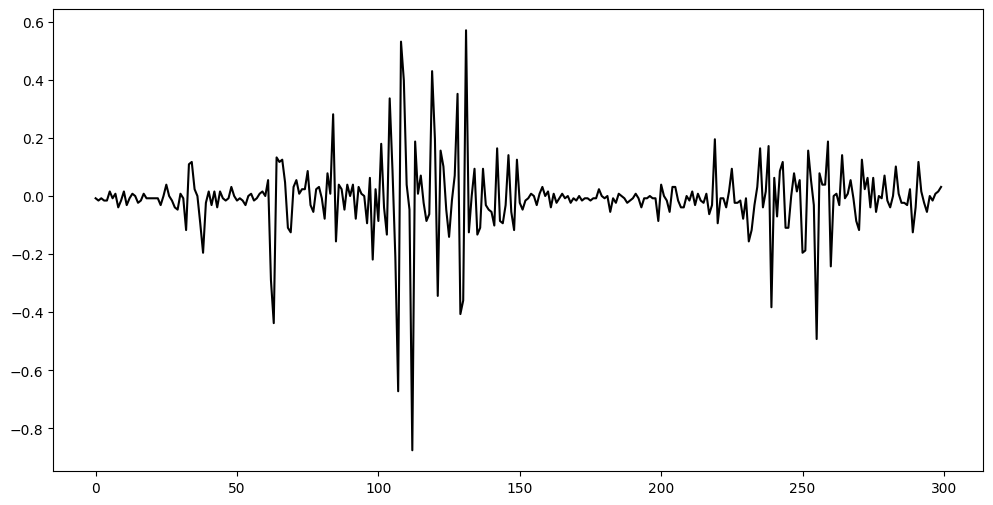

In [73]:
data1=df.iloc[:,0]
data2=data1[0:300]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data2, color='k')
fig.set_size_inches((12, 6))  # tamaño en pulgadas: ancho = 12, altura = 6
plt.show()

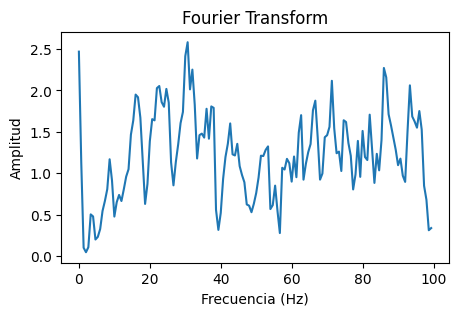

In [35]:
import numpy as np
import matplotlib.pyplot as plt

fs = 200

# Seleccionar una ventana
window = np.hanning(len(data2))

# Aplicar la ventana a los datos
data2_windowed = data2 * window

# Calcular la transformada de Fourier de los datos
n = len(data2)
fft_data = np.fft.fft(data2_windowed, n=n)

# Calcular la magnitud de la transformada de Fourier unilateral
fft_mag = 2 * np.abs(fft_data[:n//2])

# Calcular las frecuencias correspondientes
freqs = np.fft.fftfreq(n, d=1/fs)[:n//2]

# Graficar los resultados
fig, ax = plt.subplots()
ax.plot(freqs, fft_mag)
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Amplitud')
ax.set_title('Fourier Transform')
# Establecer el tamaño del plot
fig.set_size_inches((5, 3))
plt.show()

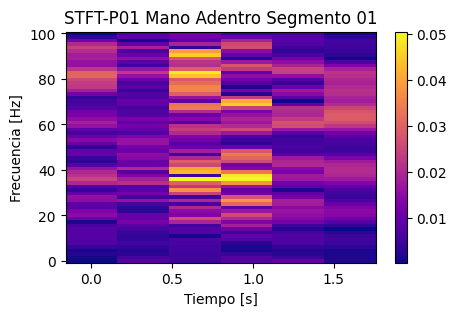

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

fs = 200
win_sz = int(128)  # Tamaño de la ventana en muestras
ham_win = np.hamming(win_sz)  # Ventana de Hamming

# Calcular el espectrograma
f, t, Zxx = stft(data2, fs, window=ham_win, nperseg=win_sz, noverlap=64)

# Graficar el espectrograma
fig, ax = plt.subplots()
im = ax.pcolormesh(t, f, np.abs(Zxx), cmap='plasma')
ax.set_ylabel('Frecuencia [Hz]')
ax.set_xlabel('Tiempo [s]')
ax.set_title('STFT-P01 Mano Adentro Segmento 01')
# Agrega la barra de color
fig.colorbar(im, ax=ax)
# Establecer el tamaño del plot
fig.set_size_inches((5, 3))
plt.show()

# MANO AFUERA

In [25]:
df = pd.read_excel(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\Pacientes_6000\P10\mano afuera.xlsx")
df

,Canal_1,Canal_2,Canal_3,Canal_4,Canal_5,Canal_6,Canal_7,Canal_8
0,-0.023438,-0.023438,0.000000,-0.007812,0.007812,0.000000,0.000000,-0.015625
1,-0.007812,0.015625,-0.031250,-0.015625,-0.015625,0.000000,0.000000,-0.023438
2,-0.031250,-0.023438,0.023438,-0.023438,-0.015625,-0.015625,-0.015625,-0.031250
3,-0.015625,0.000000,0.000000,-0.007812,0.000000,-0.015625,0.000000,-0.023438
4,-0.023438,-0.015625,0.000000,0.023438,0.000000,-0.023438,-0.031250,-0.007812
...,...,...,...,...,...,...,...,...
5995,0.007812,0.015625,-0.031250,0.007812,-0.015625,-0.015625,0.000000,0.000000
5996,-0.015625,-0.070312,-0.031250,-0.023438,-0.007812,-0.023438,-0.015625,-0.007812
5997,-0.023438,0.039062,-0.039062,0.000000,-0.007812,0.000000,-0.023438,0.000000
5998,-0.015625,0.015625,-0.054688,0.015625,-0.007812,-0.023438,0.000000,-0.007812


In [26]:
emg_data = df.values
duration = emg_data.shape[0] / 200
time = np.linspace(0, duration, emg_data.shape[0])


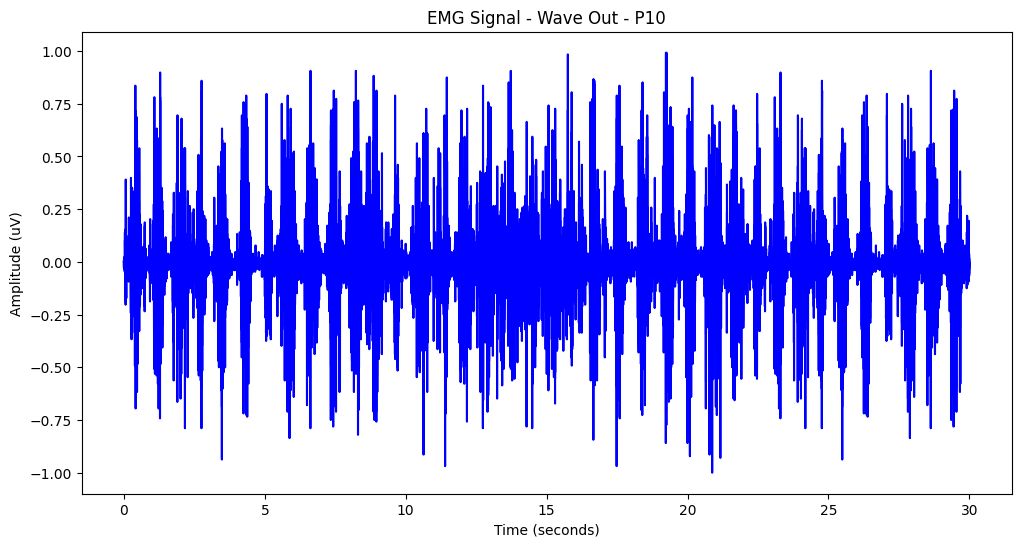

In [27]:
fig, ax = plt.subplots()
ax.plot(time, emg_data, color ='b')
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Amplitude (uV)")
ax.set_title("EMG Signal - Wave Out - P10")
#ax.legend(["Canal 1", "Canal 2", "Canal 3", "Canal 4", "Canal 5", "Canal 6", "Canal 7", "Canal 8"])

# ajustar el tamaño de la figura para ampliar el plot horizontalmente
fig.set_size_inches((12, 6))  # tamaño en pulgadas: ancho = 12, altura = 6
#Guardar la señal EMG del segmento
#filename = "ManoAbierta.png"
#folder = r"C:\Users\JUANPABLOGASCA\Desktop\Posturas"
#plt.savefig(folder + "/" + filename)
plt.show()

# PUÑO

In [29]:
df = pd.read_excel(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\Pacientes_6000\P10\puño.xlsx")
df

,Canal_1,Canal_2,Canal_3,Canal_4,Canal_5,Canal_6,Canal_7,Canal_8
0,0.000000,-0.007812,-0.015625,-0.031250,-0.015625,-0.023438,0.000000,0.000000
1,0.007812,0.000000,-0.015625,0.000000,0.015625,-0.054688,-0.039062,0.015625
2,-0.007812,0.000000,0.000000,-0.023438,-0.007812,0.093750,0.054688,0.015625
3,0.000000,-0.015625,0.000000,-0.007812,0.007812,-0.023438,-0.015625,0.007812
4,-0.015625,-0.015625,-0.015625,0.007812,-0.023438,-0.078125,-0.015625,-0.015625
...,...,...,...,...,...,...,...,...
5995,-0.054688,-0.015625,-0.039062,-0.015625,0.007812,0.000000,-0.015625,0.039062
5996,-0.085938,-0.031250,-0.023438,-0.039062,-0.031250,-0.023438,-0.015625,-0.039062
5997,0.101562,0.070312,0.054688,-0.023438,-0.023438,0.007812,-0.015625,0.070312
5998,-0.078125,-0.046875,-0.023438,-0.023438,-0.031250,-0.062500,-0.015625,-0.039062


In [30]:
emg_data = df.values
duration = emg_data.shape[0] / 200
time = np.linspace(0, duration, emg_data.shape[0])

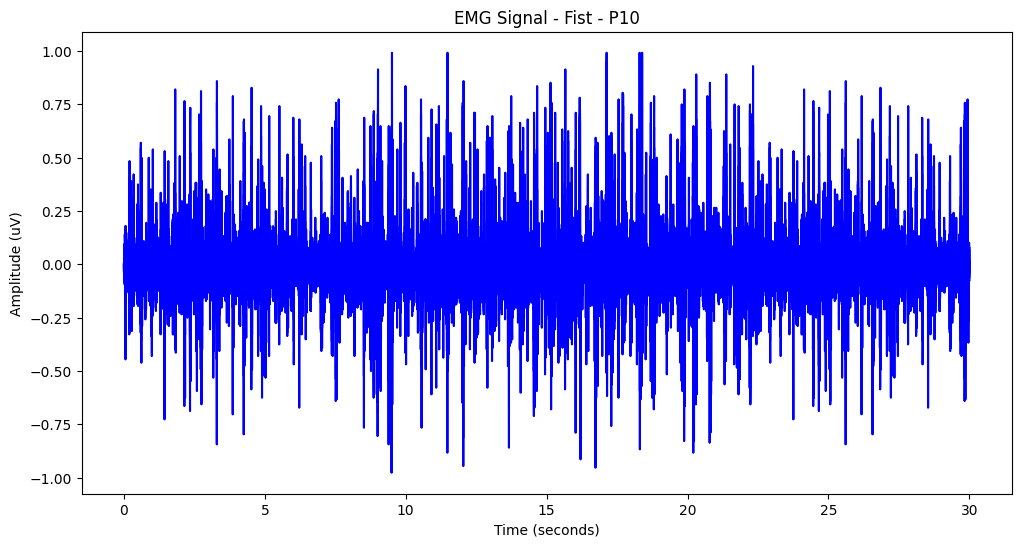

In [32]:
fig, ax = plt.subplots()
ax.plot(time, emg_data, color ='b')
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Amplitude (uV)")
ax.set_title("EMG Signal - Fist - P10")
#ax.legend(["Canal 1", "Canal 2", "Canal 3", "Canal 4", "Canal 5", "Canal 6", "Canal 7", "Canal 8"])

# ajustar el tamaño de la figura para ampliar el plot horizontalmente
fig.set_size_inches((12, 6))  # tamaño en pulgadas: ancho = 12, altura = 6
#Guardar la señal EMG del segmento
#filename = "ManoAbierta.png"
#folder = r"C:\Users\JUANPABLOGASCA\Desktop\Posturas"
#plt.savefig(folder + "/" + filename)
plt.show()

# PINZA

In [33]:
df = pd.read_excel(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\Pacientes_6000\P10\pinza.xlsx")
df

,Canal_1,Canal_2,Canal_3,Canal_4,Canal_5,Canal_6,Canal_7,Canal_8
0,-0.031250,-0.031250,-0.023438,-0.007812,-0.023438,-0.039062,-0.078125,0.000000
1,-0.015625,-0.007812,-0.007812,0.000000,-0.085938,-0.164062,-0.031250,0.007812
2,-0.015625,0.015625,0.007812,0.000000,0.054688,-0.023438,-0.007812,-0.007812
3,-0.039062,-0.046875,-0.015625,-0.031250,-0.109375,-0.320312,-0.132812,-0.054688
4,0.070312,0.031250,0.031250,0.085938,0.312500,0.617188,0.304688,0.125000
...,...,...,...,...,...,...,...,...
5995,0.125000,0.000000,-0.015625,-0.023438,-0.015625,-0.023438,-0.023438,0.000000
5996,-0.312500,-0.109375,-0.039062,-0.039062,-0.085938,-0.062500,-0.023438,-0.117188
5997,0.023438,-0.046875,0.007812,0.000000,0.039062,0.054688,0.054688,-0.023438
5998,-0.039062,0.117188,0.023438,-0.015625,-0.054688,-0.023438,-0.031250,0.000000


In [34]:
emg_data = df.values
duration = emg_data.shape[0] / 200
time = np.linspace(0, duration, emg_data.shape[0])

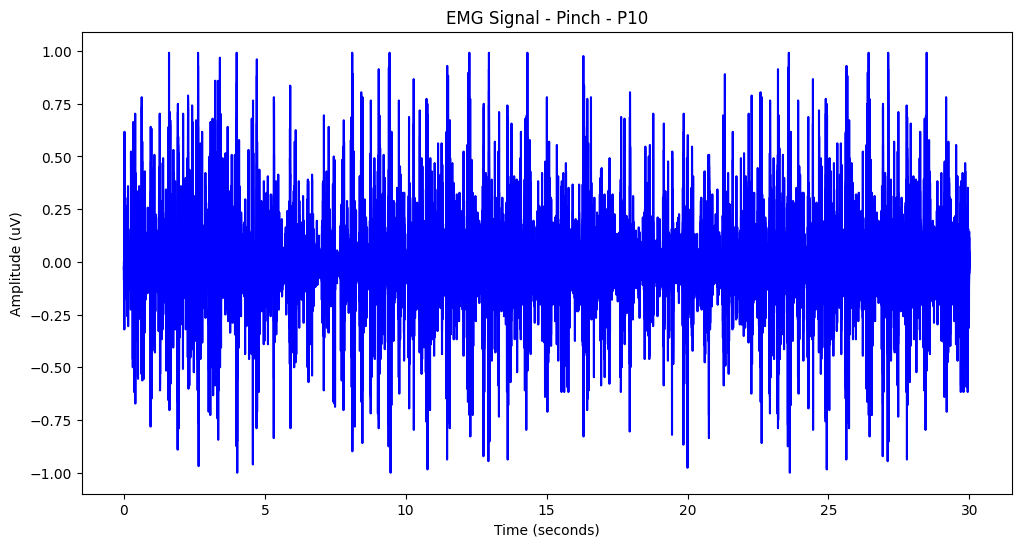

In [35]:
fig, ax = plt.subplots()
ax.plot(time, emg_data, color ='b')
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Amplitude (uV)")
ax.set_title("EMG Signal - Pinch - P10")
#ax.legend(["Canal 1", "Canal 2", "Canal 3", "Canal 4", "Canal 5", "Canal 6", "Canal 7", "Canal 8"])

# ajustar el tamaño de la figura para ampliar el plot horizontalmente
fig.set_size_inches((12, 6))  # tamaño en pulgadas: ancho = 12, altura = 6
#Guardar la señal EMG del segmento
#filename = "ManoAbierta.png"
#folder = r"C:\Users\JUANPABLOGASCA\Desktop\Posturas"
#plt.savefig(folder + "/" + filename)
plt.show()

# REPOSO

In [42]:
df = pd.read_excel(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\Pacientes_6000\P10\reposo.xlsx")
df

,Canal_1,Canal_2,Canal_3,Canal_4,Canal_5,Canal_6,Canal_7,Canal_8
0,0.000000,-0.007812,0.000000,-0.007812,-0.007812,-0.023438,-0.023438,-0.007812
1,0.000000,-0.015625,0.000000,-0.015625,-0.007812,0.000000,0.000000,-0.007812
2,-0.015625,-0.007812,-0.023438,-0.015625,-0.015625,-0.023438,-0.015625,-0.023438
3,0.000000,-0.007812,-0.007812,-0.023438,-0.007812,0.000000,-0.007812,-0.015625
4,0.000000,-0.007812,-0.023438,-0.015625,-0.015625,0.000000,0.000000,-0.007812
...,...,...,...,...,...,...,...,...
5995,-0.007812,-0.015625,0.000000,-0.007812,-0.015625,-0.007812,0.000000,-0.023438
5996,0.000000,0.000000,-0.015625,-0.015625,-0.023438,0.000000,-0.007812,-0.007812
5997,0.000000,0.000000,-0.015625,-0.015625,0.000000,-0.023438,-0.015625,0.000000
5998,-0.015625,-0.007812,0.000000,-0.007812,-0.007812,0.000000,-0.007812,-0.007812


In [43]:
emg_data = df.values
duration = emg_data.shape[0] / 200
time = np.linspace(0, duration, emg_data.shape[0])

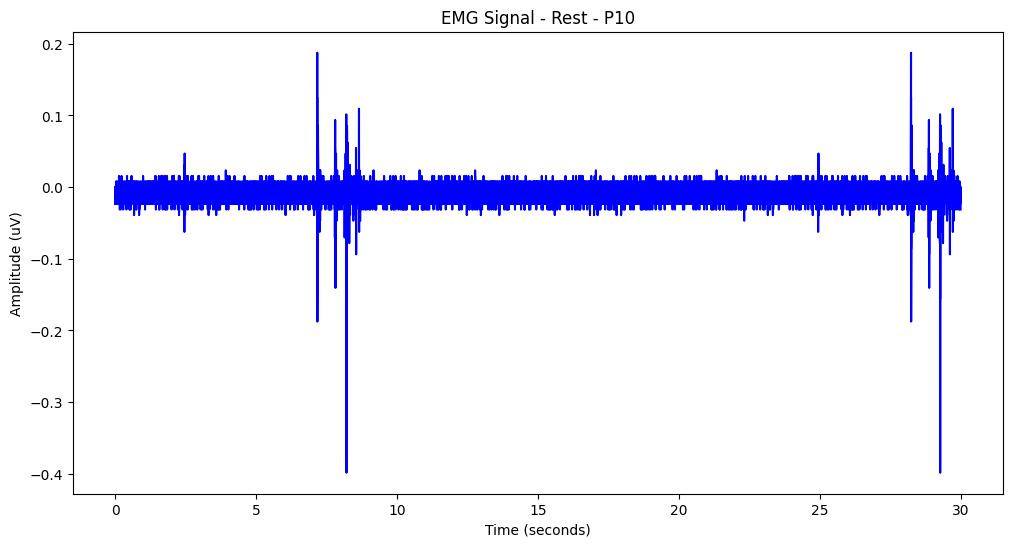

In [45]:
fig, ax = plt.subplots()
ax.plot(time, emg_data, color ='b')
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Amplitude (uV)")
ax.set_title("EMG Signal - Rest - P10")
#ax.legend(["Canal 1", "Canal 2", "Canal 3", "Canal 4", "Canal 5", "Canal 6", "Canal 7", "Canal 8"])

# ajustar el tamaño de la figura para ampliar el plot horizontalmente
fig.set_size_inches((12, 6))  # tamaño en pulgadas: ancho = 12, altura = 6
#Guardar la señal EMG del segmento
#filename = "ManoAbierta.png"
#folder = r"C:\Users\JUANPABLOGASCA\Desktop\Posturas"
#plt.savefig(folder + "/" + filename)
plt.show()

# SHORT TIME FOURIER TRANSFORM

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, stft
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

df = pd.read_excel(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_6000\P01\mano abierta.xlsx")
df

,Canal_1,Canal_2,Canal_3,Canal_4,Canal_5,Canal_6,Canal_7,Canal_8
0,0.031250,-0.335938,-0.195312,-0.031250,0.078125,0.031250,0.078125,0.007812
1,-0.117188,0.304688,0.453125,0.140625,-0.070312,-0.007812,0.015625,-0.054688
2,-0.101562,-0.320312,-0.117188,0.109375,0.125000,0.023438,-0.015625,0.007812
3,-0.359375,-0.132812,-0.570312,-0.273438,-0.093750,-0.078125,-0.085938,-0.062500
4,0.281250,0.187500,0.570312,0.289062,0.101562,0.031250,0.031250,-0.093750
...,...,...,...,...,...,...,...,...
5995,0.007812,-0.031250,-0.023438,-0.031250,-0.109375,-0.109375,-0.093750,-0.062500
5996,0.007812,0.039062,0.007812,0.000000,0.078125,0.164062,0.101562,-0.007812
5997,0.000000,0.000000,-0.007812,-0.015625,-0.101562,-0.156250,0.039062,0.031250
5998,0.007812,0.023438,0.000000,0.023438,-0.046875,0.023438,0.046875,-0.039062


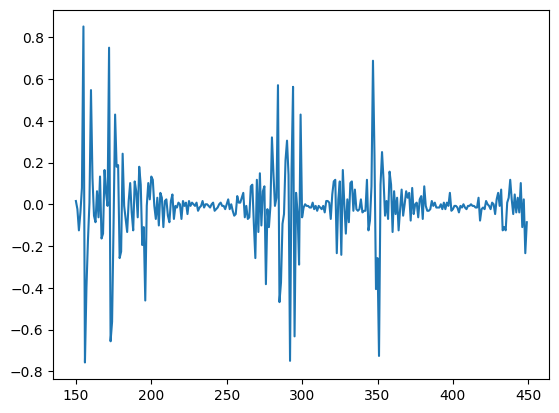

In [104]:
data1=df.iloc[:,0]
data2=data1[150:450]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data2, color='tab:blue')
plt.show()

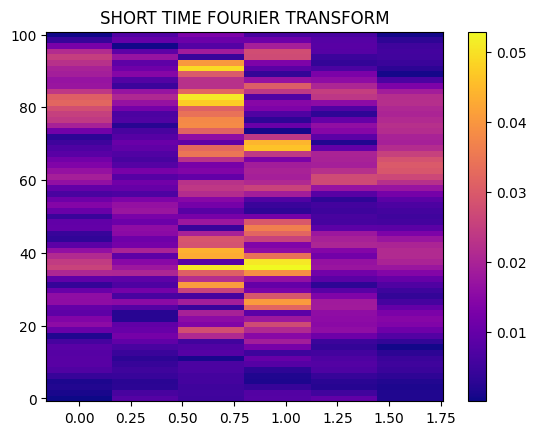

In [27]:
# Calcular la STFT del segmento - Ventana Hanning
fs = 200
win_sz = 128
ham_win = np.hanning(win_sz)

# Definir la longitud de cada segmento y el overlap
segment_length = 300
overlap = 150
t = np.arange(0, segment_length/fs, 1/fs)
emg = data2

f, t, Zxx = stft(emg, fs, window=ham_win, nperseg=win_sz, noverlap=win_sz-64)

# Graficar la STFT del segmento
plt.pcolormesh(t, f, np.abs(Zxx), cmap='plasma') #Spectral, and viridis
plt.title("SHORT TIME FOURIER TRANSFORM")
plt.colorbar()
fig = plt.gcf()

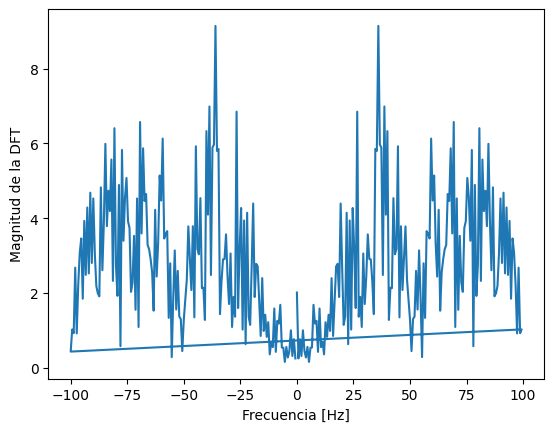

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
segment_length = 300
overlap = 150
fs = 200

# Señal de ejemplo
t = np.arange(0, segment_length/fs, 1/fs)
emg = data2

# Calcular la DFT de la señal
X = np.fft.fft(emg)

# Obtener la frecuencia de cada bin de la DFT
freq = np.fft.fftfreq(len(emg), 1/fs)

# Graficar la magnitud de la DFT
plt.plot(freq, np.abs(X))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud de la DFT')
plt.show()




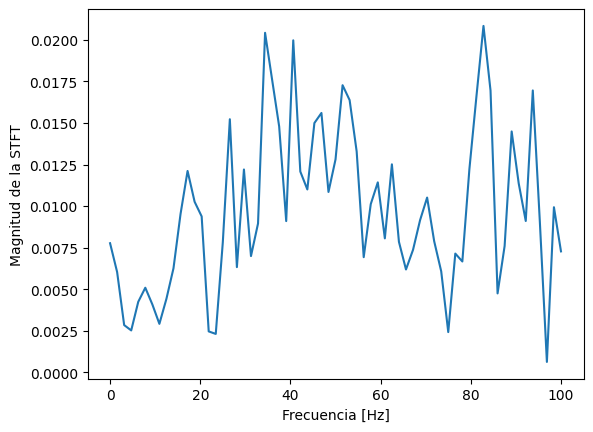

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Encontrar el índice en t que corresponde al tiempo deseado
time_idx = np.argmin(np.abs(t - 0.2))

# Seleccionar la fila correspondiente en la matriz de STFT
stft_slice = np.abs(Zxx[:, time_idx])

# Graficar la magnitud de la STFT para el tiempo deseado
plt.plot(f, stft_slice)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud de la STFT')
plt.show()